<a href="https://colab.research.google.com/github/epicskills1/PRODIGY_ML_02/blob/main/CustomerSegmentationusingKMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.model_selection import train_test_split


Loading and Exploring the Dataset


In [ ]:
# Load the data from CSV file into a DataFrame
customer_data = pd.read_csv('/content/Mall_Customers.csv')

# Display the first 5 rows
print(customer_data.head())

# Checking the shape of the dataset
print("Dataset Shape:", customer_data.shape)

# Getting information about the dataset
customer_data.info()

# Checking for missing values
print("Missing Values:\n", customer_data.isnull().sum())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Dataset Shape: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Missing Values:
 CustomerID     

Selecting Features for Clustering

In [ ]:
# Select 'Annual Income' and 'Spending Score' as features
X = customer_data.iloc[:, [3, 4]].values

print("Selected Features:\n", X)


Selected Features:
 [[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 

Data Scaling

In [ ]:
# Scale the data using StandardScaler to standardize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])  # Display the first 5 rows of scaled data


[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


Determining the Optimal Number of Clusters using Elbow Method

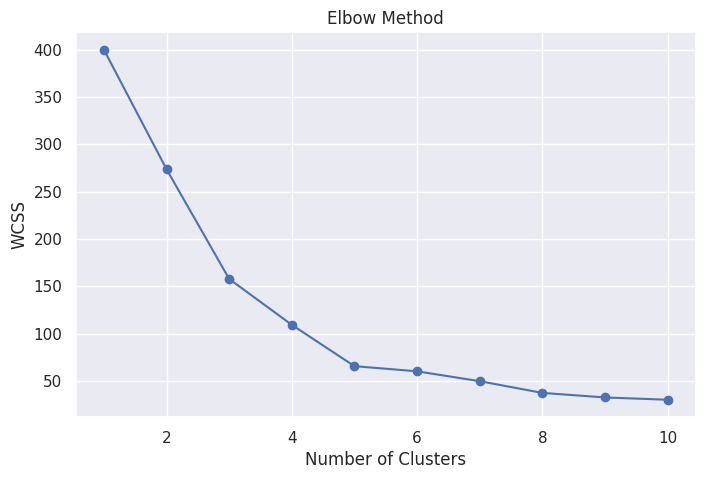

In [ ]:
# Calculate WCSS (Within-Cluster Sum of Squares) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Apply K-Means with Optimal Clusters

In [ ]:
# Applying K-Means with k=5 (optimal number of clusters from the elbow graph)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
Y = kmeans.fit_predict(X_scaled)

# Display cluster labels for each data point
print(Y[:10])


[4 2 4 2 4 2 4 2 4 2]


 Visualize the Clusters

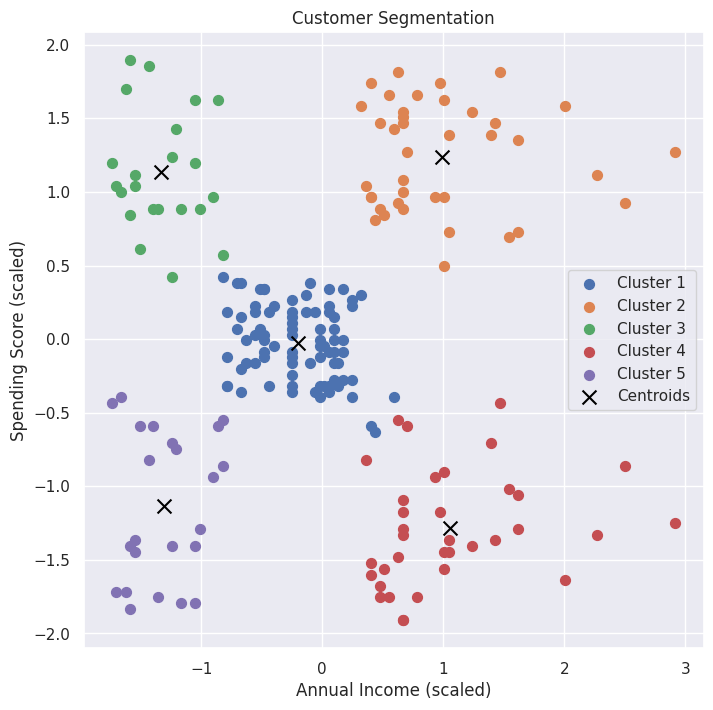

In [ ]:
# Plotting the clusters along with their centroids
plt.figure(figsize=(8, 8))
for i in range(5):
    plt.scatter(X_scaled[Y == i, 0], X_scaled[Y == i, 1], s=50, label=f'Cluster {i+1}')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', marker='x', label='Centroids')

plt.title('Customer Segmentation')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()


Evaluating the Clustering with Metrics

In [ ]:
# Silhouette Score: Measures how well-separated the clusters are
silhouette = silhouette_score(X_scaled, Y)
print(f'Silhouette Score: {silhouette:.2f}')
# Adjusted Rand Index (ARI): Measures similarity to a ground-truth clustering, assumes labels are known
# For demonstration, we use the predicted labels as both inputs (ARI = 1 in this case)
ari_score = adjusted_rand_score(Y, Y)
print(f'Adjusted Rand Index (ARI): {ari_score:.2f}')

Silhouette Score: 0.55
Adjusted Rand Index (ARI): 1.00
